<u><b>Desafio n° 1:</b></u>
<b>Analisis Exploratorio de Dataset de precios de propiedades</b>

<b>Grupo 4</b>

<b>Integrantes</b>
<ul>
<li>Angeli, Francesco</li>
<li>Brandan, Gabriel</li>
<li>Cubric, Walter</li>
<li>Giusti, Patricio Daniel</li>
<li>Morelli, Francisco</li>
<li>Sanchez, Hernán</li>
</ul>
<b>Imports</b>

In [153]:
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re

import plotly.express as px

import seaborn as sns


<u><b>Base de datos</b></u> inmobiliaria Prosperati año 2017

In [2]:
#importacion base de datos#

data = pd.read_csv("Data/properati.csv", sep=",")

#print tipo de datos
print(data.dtypes)

#ejemplo primeros tres
data.head(3)


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [3]:
#revisamos los campos nulos en el dataframe
cant_nulos_por_campo = data.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo)

#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos

cant_registros = data.shape[0]
print(cant_registros)

porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print(porc_nulos_por_campo)

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64
121220
Unnamed: 0        

<b>Importante</b>
<p>Las columnas <b>price</b>, <b>currency</b>, <b>price_aprox_local_currency</b> y <b>price_aprox_usd</b> presentan la misma cantidad de datos faltantes. 


In [4]:
#creamos 3 variables que almacenan las columnas nulas de  price_usd_null , price_aprox_local_null y price_null
mask_price_usd_null = data['price_aprox_usd'].isnull()
mask_price_null = data['price'].isnull() 
mask_price_aprox_local_null = data['price_aprox_local_currency'].isnull()



In [5]:
#comprobamos que la columna price_usd_null es identica a price_aprox_local_null  
any(data[mask_price_usd_null] == data[mask_price_aprox_local_null])

True

In [6]:
#comprobamos que la columna price_usd_null es identica a price_null  
any(data[mask_price_usd_null] == data[mask_price_null])

True

<b>Importante</b>

Al comparar las 3 columnas, sabemos que los indices de los datos faltantes son identicos en los 3. Podemos decir que si eliminamos esos valores nulos o vacios, nos quedamos con datos completos en las columnas <b>price</b>, <b>price_aprox_local_currency</b> y <b>price_aprox_usd</b>

In [7]:
#Debido a que las columnas nulas son identicas, por procederemos a limpiar los datos nulos de la columna price_aprox_usd. Entendemos que si el estudio busca saber cuanto
#es el costo de una propiedad en un barrio de una ciudad/ provincia, la manera más razonable para poder calcular esto es tener
#su valor en dólares que varía menos que su valor en $ (pesos argentinos) en el tiempo.

price_usd_notnull = data['price_aprox_usd'].notnull()
price_notnull = data['price'].notnull()
price_aprox_local_notnull = data['price_aprox_local_currency'].notnull()


data[price_usd_notnull].head(6)



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...


In [8]:
#Segun ya vimos, los datos nulos dentro de  state_name(provincias), Place_Name(ciudad) y place_with_parent_names (pais, provincia, ciudad) 
# presentan datos nulos ni faltantes.  
provincias = data['state_name']
provincias_unicos = provincias.unique()

print ("provincias", provincias_unicos)

print ( "cantidad de provincias", provincias_unicos.shape)

provincias ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']
cantidad de provincias (28,)


<b>Importante</b>
<p>sabemos entonces que no hay datos repetidos ni faltantes de provincias, y que el numero total es 28 ( 22 provincias, CABA y la provincia de Buenos Aires Seccionada en 5 distritos)

In [9]:
ciudades = data['place_name']
ciudades_unicos = ciudades.unique()


pais_provincia_ciudad = data['place_with_parent_names']
pais_provincia_ciudad_unicos = data['place_with_parent_names'].unique()


print ( "cantidad de provincias", provincias_unicos.shape, "cantidad de ciudades" ,ciudades_unicos.shape, "cantidad de mixtos", pais_provincia_ciudad_unicos.shape)

cantidad de provincias (28,) cantidad de ciudades (1061,) cantidad de mixtos (1164,)


<b>Importante</b>
<p>sabemos por la columna <b>place_with_parent_names</b> que si utilizamos la combinación de provincias y ciudades, nos estariamos alcanzando el nivel de detalle en algunas ciudades para poder determinar el valor de cada barrio o ciudad especificamente. Por ejemplo Mar del Plata, posee 52 barrios acumulando los mismos 10006 valores.
    Es necesario que toda la ciudad sea renombrada de igual manera para poder ser correctamente identificada

In [10]:
#Creamos una nueva columna de limpieza de ciudades
data['place_name_clean'] = data['place_name']
ciudades_limpieza = data['place_name_clean'].astype('str')
ciudades_limpieza
#filtramos solamente la costa atlantica
bsas_costa_mask = provincias == 'Buenos Aires Costa Atlántica'
#filtramos en el concatenado completo todas filas que contienen de Mar del Plata
mdq_mask = ((data['place_with_parent_names'].str.contains('Mar del Plata')))

data[mdq_mask].head()



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,place_name_clean
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,Centro
68,68,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.034794,-57.5416872",-38.034794,...,NaN,3263.888889,NaN,2.0,NaN,http://www.properati.com.ar/15bx4_venta_depart...,"Cocina integrada con barra , horno y anafe .T...",EXCELENTE DEPARTAMENTO CON VISTA AL MAR Y AL GOLF,https://thumbs4.properati.com/2/-WPR2ibAcpGmjF...,Mar del Plata
69,69,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0150119,-57.5341134",-38.015012,...,1054.216867,1690.821256,NaN,6.0,NaN,http://www.properati.com.ar/15bx5_venta_casa_m...,HERMOSO E IMPECABLE CHALET DE ESTILO CLÁSICO D...,IMPECABLE CHALET DE ESTILO CLASICO EN EL CORAZ...,https://thumbs4.properati.com/1/HBRWQTniQ6Z7IE...,Mar del Plata
70,70,sell,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9765072,-57.5695686",-37.976507,...,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15bx8_venta_ph_mar...,COMPLETO DE DTOS. EN PH. TRES DTOS DE 2 AMB. E...,COMPLEJO DE DTOS. EN PH. - TRES DTOS DE 2 AMB....,https://thumbs4.properati.com/0/aoKEdCrsDgE28O...,Mar del Plata
71,71,sell,PH,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9765072,-57.5695686",-37.976507,...,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/15bx9_venta_ph_mar...,COMPLEjO DE DTOS. EN PH. DOS DTOS DE 3 AMB. EN...,COMPLEJO DTOS. EN PH - DOS DTOS DE 3 AMB. CON ...,https://thumbs4.properati.com/0/fw0Vk3QO11ZiQZ...,Mar del Plata


In [16]:
mdq_la_perla_mask = data["place_with_parent_names"] == "|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|La Perla|"
data.loc[mdq_la_perla_mask, "place_name_clean"] = "Mar del Plata La Perla"

mdq_centro_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|"
data.loc[mdq_centro_mask, "place_name_clean"] = "Mar del Plata Centro"

mdq_caisamar_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Caisamar|"
data.loc[mdq_caisamar_mask, "place_name_clean"] = "Mar del Plata Caisamar"

mdq_macrocentro_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Macrocentro|"
data.loc[mdq_macrocentro_mask, "place_name_clean"] = "Mar del Plata Macrocentro"

mdq_pcolon_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Colón|"
data.loc[mdq_pcolon_mask, "place_name_clean"] = "Mar del Plata Plaza Colón"

mdq_pompeya_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Pompeya|"
data.loc[mdq_pompeya_mask, "place_name_clean"] = "Mar del Plata Pompeya"

mdq_terminal_nueva_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Terminal Nueva|"
data.loc[mdq_terminal_nueva_mask, "place_name_clean"] = "Mar del Plata Terminal Nueva"

mdq_pinos_anchorena_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Pinos de Anchorena|"
data.loc[mdq_pinos_anchorena_mask, "place_name_clean"] = "Mar del Plata Pinos de Anchorena"

mdq_plaza_mitre_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Mitre|"
data.loc[mdq_plaza_mitre_mask, "place_name_clean"] = "Mar del Plata Plaza Mitre"

mdq_acantilados_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Los Acantilados|"
data.loc[mdq_acantilados_mask, "place_name_clean"] = "Mar del Plata Los Acantilados"

mdq_pchica_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Chica|"
data.loc[mdq_pchica_mask, "place_name_clean"] = "Mar del Plata Playa Chica"

mdq_pgrande_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Grande|"
data.loc[mdq_pgrande_mask, "place_name_clean"] = "Mar del Plata Playa Grande"

mdq_chauvin_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Chauvín|"
data.loc[mdq_chauvin_mask, "place_name_clean"] = "Mar del Plata Chauvín"

mdq_donbosco_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Don Bosco|"
data.loc[mdq_donbosco_mask, "place_name_clean"] = "Mar del Plata Don Bosco"

mdq_troncos_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Los Troncos|"
data.loc[mdq_troncos_mask, "place_name_clean"] = "Mar del Plata Los Troncos"

mdq_stellamaris_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Stella Maris|"
data.loc[mdq_stellamaris_mask, "place_name_clean"] = "Mar del Plata Stella Maris"

mdq_primerajunta_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Primera Junta|"
data.loc[mdq_primerajunta_mask, "place_name_clean"] = "Mar del Plata Primera Junta"

mdq_constitucion_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Constitución|"
data.loc[mdq_constitucion_mask, "place_name_clean"] = "Mar del Plata Constitución"

mdq_sancarlos_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|San Carlos|"
data.loc[mdq_sancarlos_mask, "place_name_clean"] = "Mar del Plata San Carlos"

mdq_puerto_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Puerto|"
data.loc[mdq_puerto_mask, "place_name_clean"] = "Mar del Plata Puerto"

mdq_guemes_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Güemes|"
data.loc[mdq_guemes_mask, "place_name_clean"] = "Mar del Plata Güemes"

mdq_materno_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Materno|"
data.loc[mdq_materno_mask, "place_name_clean"] = "Mar del Plata Materno"

mdq_rumenco_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Rumenco|"
data.loc[mdq_rumenco_mask, "place_name_clean"] = "Mar del Plata Rumenco"
#
mdq_varese_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Varese|"
data.loc[mdq_varese_mask, "place_name_clean"] = "Mar del Plata Playa Varese"

mdq_luro_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Parque Luro|"
data.loc[mdq_luro_mask, "place_name_clean"] = "Mar del Plata Parque Luro"

mdq_pinares_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Los Pinares|"
data.loc[mdq_pinares_mask, "place_name_clean"] = "Mar del Plata Los Pinares"

mdq_sanjuan_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|San Juan|"
data.loc[mdq_sanjuan_mask, "place_name_clean"] = "Mar del Plata San Juan"

mdq_bosque_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Bosque Peralta Ramos|"
data.loc[mdq_bosque_mask, "place_name_clean"] = "Mar del Plata Bosque Peralta Ramos"
#
mdq_villaprimera_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Villa Primera|"
data.loc[mdq_villaprimera_mask, "place_name_clean"] = "Mar del Plata Villa Primera"

mdq_torreon_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Torreón|"
data.loc[mdq_torreon_mask, "place_name_clean"] = "Mar del Plata Torreón"

mdq_terminalvieja_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Terminal Vieja|"
data.loc[mdq_terminalvieja_mask, "place_name_clean"] = "Mar del Plata Terminal Vieja"

mdq_fortunato_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Fortunato de La Plaza|"
data.loc[mdq_fortunato_mask, "place_name_clean"] = "Mar del Plata Barrio Fortunato de La Plaza"

mdq_mogotes_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Punta Mogotes|"
data.loc[mdq_mogotes_mask, "place_name_clean"] = "Mar del Plata Punta Mogotes"

mdq_rocha_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Rocha|"
data.loc[mdq_rocha_mask, "place_name_clean"] = "Mar del Plata Plaza Rocha"
#
mdq_baltocamet_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Alto Camet|"
data.loc[mdq_baltocamet_mask, "place_name_clean"] = "Mar del Plata Barrio Alto Camet"

mdq_bsanjuan_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio San Juan|"
data.loc[mdq_bsanjuan_mask, "place_name_clean"] = "Mar del Plata Barrio San Juan"

mdq_alem_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Alem|"
data.loc[mdq_alem_mask, "place_name_clean"] = "Mar del Plata Alem"

mdq_cpramos_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Colina de Peralta Ramos|"
data.loc[mdq_cpramos_mask, "place_name_clean"] = "Mar del Plata Colina de Peralta Ramos"

mdq_bperlanorte_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio La Perla Norte|"
data.loc[mdq_bperlanorte_mask, "place_name_clean"] = "Mar del Plata Barrio La Perla Norte"
#
mdq_mundialista_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Mundialista|"
data.loc[mdq_mundialista_mask, "place_name_clean"] = "Mar del Plata Mundialista"

mdq_chapadmalal_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Chapadmalal|"
data.loc[mdq_chapadmalal_mask, "place_name_clean"] = "Mar del Plata Chapadmalal"

mdq_bernardinorivadavia_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Bernardino Rivadavia|"
data.loc[mdq_bernardinorivadavia_mask, "place_name_clean"] = "Mar del Plata Bernardino Rivadavia"

mdq_hermitage_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Hermitage|"
data.loc[mdq_hermitage_mask, "place_name_clean"] = "Mar del Plata Hermitage"

mdq_bsarmiento_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Sarmiento|"
data.loc[mdq_bsarmiento_mask, "place_name_clean"] = "Mar del Plata - Barrio Sarmiento"
#
mdq_alfar_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Alfar|"
data.loc[mdq_alfar_mask, "place_name_clean"] = "Mar del Plata Alfar"

mdq_gsanmartin_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Gral San Martin|"
data.loc[mdq_gsanmartin_mask, "place_name_clean"] = "Mar del Plata Gral San Martin"

mdq_faronorte_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Faro Norte|"
data.loc[mdq_faronorte_mask, "place_name_clean"] = "Mar del Plata Faro Norte"

mdq_puntaiglesia_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Punta Iglesia|"
data.loc[mdq_puntaiglesia_mask, "place_name_clean"] = "Mar del Plata Punta Iglesia"

mdq_pserena_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Serena|"
data.loc[mdq_pserena_mask, "place_name_clean"] = "Mar del Plata Playa Serena"

mdq_juramento_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Juramento|"
data.loc[mdq_juramento_mask, "place_name_clean"] = "Mar del Plata Juramento"

mdq_bcamet_mask = data["place_with_parent_names"] =="|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Camet|"
data.loc[mdq_bcamet_mask, "place_name_clean"] = "Mar del Plata Barrio Camet"




#prueba la perla
placename_chauvin_mask = (data['place_name'] == "Chauvín")

#print chauvin
data[placename_chauvin_mask].head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,place_name_clean
11010,11010,sell,apartment,Chauvín,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,"-38.0152554,-57.5666825",-38.015255,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/16a6z_venta_depart...,"Semipiso de 3 ambientes a estrenar en Chauvin,...",SEMIPISO 3 AMB A ESTRENAR EN CHAUVIN,https://thumbs4.properati.com/8/n6-50fyOJmFEq-...,Mar del Plata Chauvín
12100,12100,sell,house,Chauvín,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/16j6j_venta_casa_c...,VENTA CAHLET 5 AMBIENTES MAR DEL PLATAHALL DE ...,CASA EN VENTA,https://thumbs4.properati.com/2/cNKNXiuEYKo3oB...,Mar del Plata Chauvín
12120,12120,sell,store,Chauvín,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/16j7d_venta_local_...,LOCALVENTA LOCAL EN MAR DEL PLATAJARDÍN AL FRE...,LOCAL EN VENTA,https://thumbs4.properati.com/6/5XOyln4Pht5eIz...,Mar del Plata Chauvín


In [17]:
#corroboramos que todos que contienen mar del plata en la mascara Clean y en place_with_parent_names
mdq_mask_clean = data['place_name_clean'].str.contains('Mar del Plata')
any(mdq_mask == mdq_mask_clean)


True

In [18]:
#buscamos todos los NaN
nan_mask_clean = data['place_name'].isnull()
data[nan_mask_clean]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,place_name_clean
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...,Tigre
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...,Tigre
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...,Tigre
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...,Tigre
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...,Tigre
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...,Tigre
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...,Tigre
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...,Tigre
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...,Tigre
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambien

In [70]:
#detectamos que todos los nulos son de Tigre

#reemplazamos NaN por Tigre 
nan_tigre_mask = nan_mask_clean 
data.loc[nan_tigre_mask, "place_name_clean"] = "Tigre"
data.head(5)

#detectamos que en La plata sucede algo similar que en mar del plata


lp_abasto_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Abasto|"
data.loc[lp_abasto_mask, "place_name_clean"] = "La Plata Abasto"

lp_arturosegui_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Arturo Seguí|"
data.loc[lp_arturosegui_mask, "place_name_clean"] = "La Plata Arturo Seguí"
#
lp_citybell_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|City Bell|"
data.loc[lp_citybell_mask, "place_name_clean"] = "La Plata Arturo City Bell"

lp_etcheve_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Etcheverry|"
data.loc[lp_etcheve_mask, "place_name_clean"] = "La Plata Etcheverry"

lp_gorina_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Gorina|"
data.loc[lp_gorina_mask, "place_name_clean"] = "La Plata Gorina"

lp_grandbell_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Grand Bell|"
data.loc[lp_grandbell_mask, "place_name_clean"] = "La Plata Grand Bell"

lp_haras1_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Haras del Sur I|"
data.loc[lp_haras1_mask, "place_name_clean"] = "La Plata Haras del Sur I"

#
lp_jhernandez_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|José Hernández|"
data.loc[lp_jhernandez_mask, "place_name_clean"] = "La Plata José Hernández"

lp_lolmos_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Lisandro Olmos|"
data.loc[lp_lolmos_mask, "place_name_clean"] = "La Plata Lisandro Olmos"

lp_hornos_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Los Hornos|"
data.loc[lp_hornos_mask, "place_name_clean"] = "La Plata Los Hornos"

lp_gonnet_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Manuel B Gonnet|"
data.loc[lp_gonnet_mask, "place_name_clean"] = "La Plata Manuel B Gonnet"

lp_mromero_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Melchor Romero|"
data.loc[lp_mromero_mask, "place_name_clean"] = "La Plata Melchor Romero"

lp_ringuelet_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Ringuelet|"
data.loc[lp_ringuelet_mask, "place_name_clean"] = "La Plata Ringuelet"

lp_scarlos_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|San Carlos|"
data.loc[lp_scarlos_mask, "place_name_clean"] = "La Plata San Carlos"
#
lp_slorenzo_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|San Lorenzo|"
data.loc[lp_slorenzo_mask, "place_name_clean"] = "La Plata San Lorenzo"

lp_tolosa_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Tolosa|"
data.loc[lp_tolosa_mask, "place_name_clean"] = "La Plata Tolosa"

lp_velisa_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Villa Elisa|"
data.loc[lp_velisa_mask, "place_name_clean"] = "La Plata Villa Elisa"

lp_velvira_mask = data["place_with_parent_names"] =="|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Villa Elvira|"
data.loc[lp_velvira_mask, "place_name_clean"] = "La Plata Villa Elvira"

#corroboramos que la mascara que contiene en place_with_parent_names y nuestra mascara_clean contienen los mismos elementos 
lp_mask = data['place_with_parent_names'].str.contains('La Plata')
lp_mask_clean = data['place_name_clean'].str.contains('La Plata')
any(lp_mask == lp_mask_clean)

True

In [44]:
mask_dataclean = data['place_name_clean'].astype('str')
prueba_lp = data['place_name'] == "Villa Elvira"
data[prueba_lp].head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,place_name_clean
1085,1085,sell,house,Villa Elvira,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Vil...,Argentina,Bs.As. G.B.A. Zona Sur,3832749.0,"-34.9590503,-57.8945986",-34.959050,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15h7k_venta_casa_m...,"Casa desarollada sobre lote de 17x30, metros c...",Calle 9 2366 (e/ 80y 81) 00,https://thumbs4.properati.com/5/h9rnlnP7OlqKUu...,La Plata Villa Elvira
26877,26877,sell,apartment,Villa Elvira,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Vil...,Argentina,Bs.As. G.B.A. Zona Sur,3832749.0,"-34.9507670816,-57.8804613654",-34.950767,...,5542.168675,5542.168675,NaN,5.0,NaN,http://www.properati.com.ar/17rnb_venta_depart...,"Dueo VENDE departamento en la plata, 4 e/ 612 ...",Departamento 3 Dor LA PLATA Brio Aeropuerto,https://thumbs4.properati.com/0/MvCdAJSxZ8gOTX...,La Plata Villa Elvira
26914,26914,sell,house,Villa Elvira,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Vil...,Argentina,Bs.As. G.B.A. Zona Sur,3832749.0,"-34.9623171274,-57.8869057638",-34.962317,...,933.333333,2028.985507,NaN,3.0,NaN,http://www.properati.com.ar/17rpl_venta_casa_l...,"PLATA, 7 e/ 617 Y 618 BRIO AEROPUERTO.Los tres...",3 Dptos En Block C/exc Renta Ideal Inversor,https://thumbs4.properati.com/3/Ball1kpkPSMmjz...,La Plata Villa Elvira


In [135]:
data['surface_total_in_m2_clean'] = data['surface_total_in_m2']
data_suptotal_nulos_mask = data['surface_total_in_m2'].isnull()
data.loc[data_suptotal_nulos_mask, "surface_total_in_m2_clean"] = data['surface_covered_in_m2']
data_suptotal_clean_nulos_mask = data['surface_total_in_m2_clean'].isnull()
print("metros2 nulos original",data[data_suptotal_nulos_mask].shape, "metroscuadrados nulos clean", data[data_suptotal_clean_nulos_mask].shape)


metros2 nulos original (39328, 30) metroscuadrados nulos clean (12369, 30)


In [136]:
#Creamos una columna que agrupa precios en dolares sin nulos y superficie total sin nulos y divide el primero por el segundo, sacando el valor 
#de un metro cuadrado de dicho inmueble.
data['price_usd_en_m2'] = data['price_aprox_usd']/ data['surface_total_in_m2_clean']
#en esta nueva columna, sabemos que los NaN y ceros, seran los numeros que no cuenten o con el valor en dolares o con superficie asignada
data.head(3)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,rooms,expenses,properati_url,description,title,image_thumbnail,place_name_clean,surface_total_in_m2_clean,price_usd_en_m2,price_usd_en_m2_clean
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Mataderos,55.0,1127.272727,1127.272727
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,La Plata,NaN,NaN,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,Mataderos,55.0,1309.090909,1309.090909


In [146]:
data_2 = data[data['surface_total_in_m2_clean'] > 0]

data_2['price_usd_en_m2'] = data_2['price_aprox_usd']/ data_2['surface_total_in_m2_clean']

print(data_2.shape,data.shape )


(108468, 30) (121220, 30)


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
#data_price_usd_m2_clean = data_2.dropna(subset=['price_usd_en_m2'])
#data_price_usd_m2_clean.head(3)


In [147]:
maskcapital = data_2.state_name == "Capital Federal"
group_capital = data_2[maskcapital].groupby(['place_name_clean']).count().sort_values('price_per_m2', ascending=False)
group_capital

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,surface_total_in_m2_clean,price_usd_en_m2,price_usd_en_m2_clean
place_name_clean,,,,,,,,,,,,,,,,,,,,,
Belgrano,2966,2966,2966,2966,2966,2966,2966,2966,1952,1952,...,190,1138,748,2966,2966,2966,2938,2966,2517,2517
Palermo,2831,2831,2831,2831,2831,2831,2831,2831,2045,2045,...,312,1216,809,2831,2831,2831,2810,2831,2478,2478
Caballito,2239,2239,2239,2239,2239,2239,2239,2239,1799,1799,...,331,1121,505,2239,2239,2239,2210,2239,2032,2032
Recoleta,1520,1520,1520,1520,1520,1520,1520,1520,1254,1254,...,142,873,366,1520,1520,1520,1493,1520,1403,1403
Villa Urquiza,1617,1617,1617,1617,1617,1617,1617,1617,1077,1077,...,116,552,184,1617,1617,1617,1581,1617,1350,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Agronomía,40,40,40,40,40,40,40,40,40,40,...,2,32,8,40,40,40,40,40,37,37
Velez Sarsfield,35,35,35,35,35,35,35,35,33,33,...,3,18,5,35,35,35,35,35,34,34
Villa Soldati,15,15,15,15,15,15,15,15,15,15,...,3,12,1,15,15,15,15,15,15,15


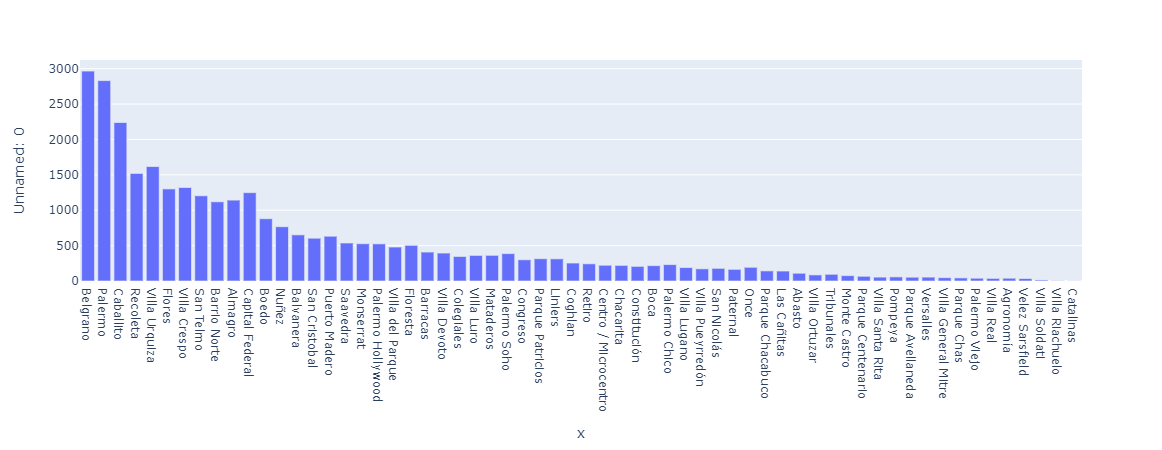

In [148]:
fig = px.bar(group_capital, x=group_capital.index, y='Unnamed: 0')
fig.show()


In [149]:
group_capital_mean = data_2[maskcapital].groupby(['place_name_clean']).mean().sort_values('price_usd_en_m2_clean', ascending=False)
group_capital_mean

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,surface_total_in_m2_clean,price_usd_en_m2,price_usd_en_m2_clean
place_name_clean,,,,,,,,,,,,,,,,,
Villa Santa Rita,39447.054545,6693230.0,-34.615428,-58.480472,179595.454545,3.168872e+06,179595.454545,126.518519,62.109091,1889.186620,37884.728484,5.636364,2.589744,1000.000000,85.236364,25849.907667,25849.907667
Versalles,52066.254545,3427510.0,-34.629243,-58.520120,234094.230769,4.130476e+06,234094.230769,158.413793,96.415094,1542.378777,17875.944028,5.000000,3.550000,2300.000000,126.018182,17020.175116,17020.175116
Puerto Madero,56961.300158,3429760.0,-34.614029,-58.362750,917347.108156,1.595045e+07,903990.127252,153.357782,140.828720,6029.687303,11619.878052,169.294118,3.071247,8382.628571,148.826224,10669.089705,10669.089705
Boedo,36034.587500,3436003.0,-34.625545,-58.417333,412662.809412,6.286890e+06,356308.783753,49.192771,45.978286,10697.513056,12173.159707,4.000000,1.394631,1772.052632,51.389773,10276.668722,10276.668722
San Cristobal,42370.047934,3429153.0,-34.622917,-58.401407,386637.036778,6.456385e+06,365914.871384,74.875000,69.494915,9952.388570,9272.067081,4.894118,2.127021,2315.184211,75.163636,8591.907611,8591.907611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Capital Federal,57821.928686,3433955.0,-34.626820,-58.436014,458605.754555,7.603071e+06,430903.164212,383.899556,197.652552,1772.903875,2828.254453,2.457627,2.711538,2723.789157,360.029647,1826.331976,1826.331976
Constitución,50729.188406,3435257.0,-34.624014,-58.384466,193307.341463,2.181913e+06,123659.669512,73.975460,70.408867,1794.471533,4107.089525,4.450000,2.179856,1471.521739,76.632850,1816.503354,1816.503354
Mataderos,64503.889807,3430787.0,-34.668666,-58.521774,180115.766854,3.178053e+06,180115.766854,152.377551,121.755418,1552.250025,2007.635900,4.714286,3.321101,988.743590,151.112948,1700.004990,1700.004990


<AxesSubplot:xlabel='place_name_clean', ylabel='price_usd_en_m2_clean'>

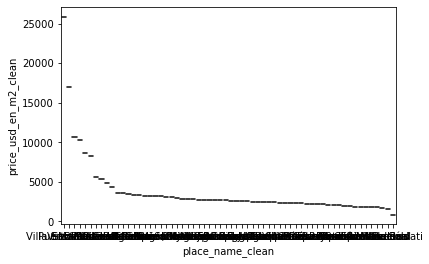

In [159]:
sns.boxplot( x=group_capital_mean.index, y=group_capital_mean['price_usd_en_m2_clean'], data=group_capital_mean)




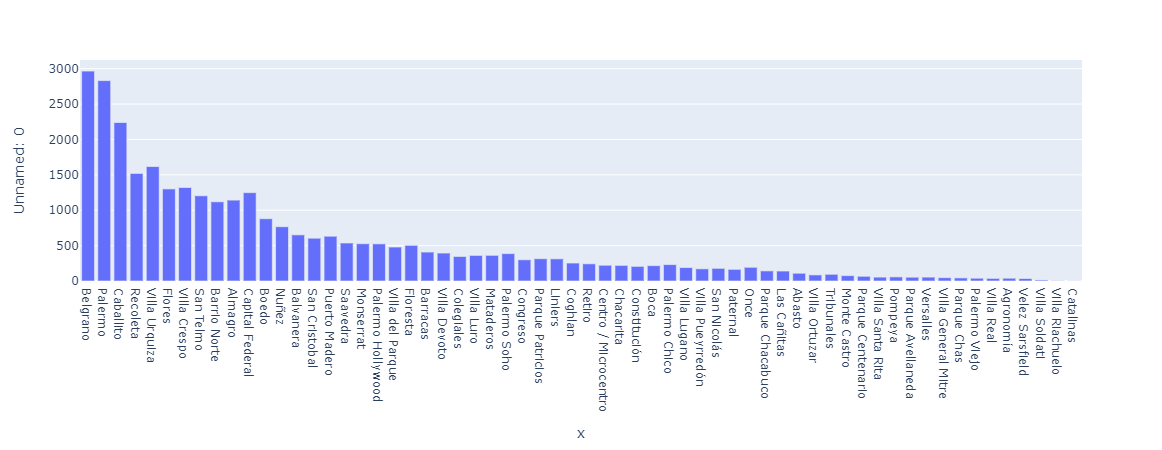

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [150]:
ig = px.bar(group_capital_mean, x=group_capital_mean.price, y='price_usd_per_m2')
fig.show() 

data_price_usd_m2_clean[maskcapital].info()
data.corr()
